<a href="https://colab.research.google.com/github/quetion/time-series-analysis_11102/blob/main/TS_week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13

## random walk and simulation
- model
$$
y_t = y_{t-1} +\epsilon_t
$$

- code for Python

## unit root `I(1)`
- Definition
- Example: AR(1)
$$
y_t = y_{t-1} + \epsilon_t
$$
- First-order Difference
$$
\Delta y_t = y_{t} - y_{t-1} = \epsilon_t
$$
## spurious regression
- Two indepenedet unit-root series has a significant linear relation.
- Example
$$
y_t = \beta_0 + \beta_1 z_t + \epsilon_t
$$

## ADF test
- Test whether the series is a unit-root series.

## detrend
- de-deterministic-trend
- de-stochastics-trend

# (Optimal)

## simulate stock price
- Model
$$
\frac{dS_t}{S_t} = \mu dt + \sigma dW_t
$$
- discretization
$$
fdfd
$$
## what is moving average
- MA(5)
$$
ma(5)_t = \frac{\sum_{i=0}^4 y_{t-i}}{5}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plot 
import statsmodels.api as sm # regression


In [2]:
!pip install yfinance
import yfinance as yf # download data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# generate random variable
np.random.choice([-1,1],p=(0.5,0.5))
# generate N(0,1)
np.random.randn() 

#1.1 random walk with [-1,1]
#solution 1
y = np.zeros(100)
for i in range(1,100):
  y[i] = y[i-1] + np.random.choice([-1,1],p=(0.5,0.5))
plt.plot(y)
#solution 2 (cumsum)
x = np.random.choice([-1,1],100)
y = x.cumsum()
print(x[0:10])
print(y[0:10])
#plt.plot(y)

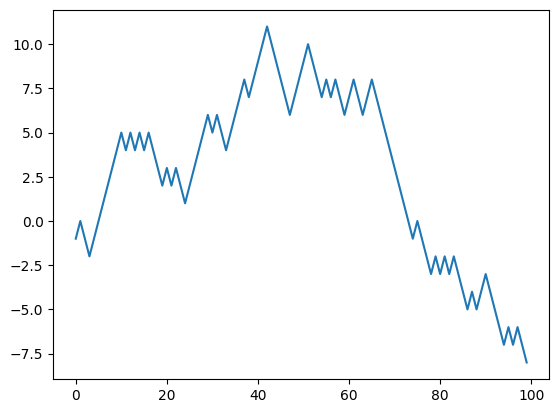

In [24]:
#solution 2 (cumsum)
x = np.random.choice([-1,1],100)
y = x.cumsum()
#print(x[0:10])
#print(y[0:10])
plt.plot(y)

In [ ]:
#1.2 random walk with N(0,1)
# solution1
y = np.zeros(100)
for i in range(1,100):
  y[i] = y[i-1] + np.random.randn()
plt.plot(y) 
# solution2
y = np.random.randn(100).cumsum()
plt.plot(y)

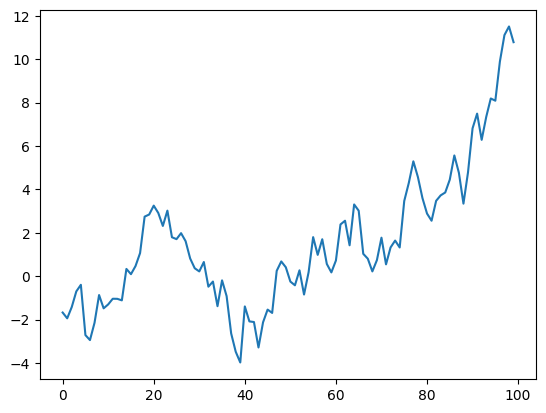

In [25]:
# solution2
y = np.random.randn(100).cumsum()
plt.plot(y)

In [43]:
# surprious regression 
# unit-root y_t z_t
y = np.random.randn(500).cumsum()
z = np.random.randn(500).cumsum()
# run regression y and z
y = pd.DataFrame(y)
x = sm.add_constant(pd.DataFrame(z))
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())
res.pvalues

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     31.89
Date:                Thu, 11 May 2023   Prob (F-statistic):           2.74e-08
Time:                        04:12:32   Log-Likelihood:                -1544.6
No. Observations:                 500   AIC:                             3093.
Df Residuals:                     498   BIC:                             3102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8995      0.243     61.295      0.0

const    3.914355e-234
0         2.741947e-08
dtype: float64

In [44]:
# surprious regression
pp = np.ones(100)
for i in range(100): 
  # unit-root y_t
  y = np.random.randn(500).cumsum()
  z = np.random.randn(500).cumsum()
  # run regression y and z
  y = pd.DataFrame(y)
  x = sm.add_constant(pd.DataFrame(z))
  res = sm.OLS(y,x,missing='drop').fit()
  pp[i] = res.pvalues[0]
num = (pp<0.05).sum()
#print(num)

In [48]:
(pp<0.05).sum()

86

In [56]:
# download data "BTC-USD"
data = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [57]:
data = data['2017':'2023']
data = data[['Close']]
data.columns = ['price_btc']

In [58]:
data['ret_btc'] = np.log(data.price_btc).diff()

In [61]:
data.head()

,price_btc,ret_btc
Date,,
2017-01-01,998.325012,NaN
2017-01-02,1021.750000,0.023193
2017-01-03,1043.839966,0.021389
2017-01-04,1154.729980,0.100960
2017-01-05,1013.380005,-0.130575


In [62]:
# test whether btc price is unit-root
#res_adf = sm.tsa.stattools.adfuller(data.price_btc)
# test whether btc return is unit-root
res_adf = sm.tsa.stattools.adfuller(data.ret_btc[1:])

In [63]:
res_adf
# Conclusion: do not reject H0 (-1.67 > -2.567)

(-33.25000008192204,
 0.0,
 1,
 2319,
 {'1%': -3.433173007001078,
  '5%': -2.8627871467151595,
  '10%': -2.56743391172832},
 -8238.818828953052)